# Course: SSIE 637 - Advanced Topics in Health Systems
## Assignment: Final Project - Fall 2019
## Binghamton University, S.U.N.Y.
## Authors: Roberto Salazar, Tanmayee Mandala, Rohini Shetty

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import data set as df
df = pd.read_csv("cardio_train.csv",sep=';')

In [3]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
# Set the features columns
df_data = df[["age","gender","height","weight","ap_hi","ap_lo","cholesterol","gluc","smoke","alco","active"]]
# Set the target column
df_target = df["cardio"]

In [5]:
# Import sklearn methods and functions
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [6]:
# Set performance measures
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

In [7]:
# LOGISTIC REGRESSION MODEL

In [8]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel_scores = cross_validate(logmodel, df_data, df_target, cv=5,
                        scoring=scoring, return_train_score=False)

C:\Users\rober\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [9]:
print("Accuracy test score: {:.3}".format(logmodel_scores['test_accuracy'].mean()))
print("Precision test score: {:.3}".format(logmodel_scores['test_precision'].mean()))
print("Sensitivty test score: {:.3}".format(logmodel_scores['test_recall'].mean()))
print("F Measure test score: {:.3}".format(logmodel_scores['test_f1_score'].mean()))

Accuracy test score: 0.695
Precision test score: 0.709
Sensitivty test score: 0.661
F Measure test score: 0.684


In [10]:
# SUPPORT VECTOR MACHINE

In [11]:
from sklearn import svm

# (this line of code takes a lot to run, be patient!)

svm_model = svm.SVC(gamma='scale')
svm_scores = cross_validate(svm_model, df_data, df_target, cv=5,
                        scoring=scoring, return_train_score=False)

In [12]:
print("Accuracy test score: {:.3}".format(svm_scores['test_accuracy'].mean()))
print("Precision test score: {:.3}".format(svm_scores['test_precision'].mean()))
print("Sensitivty test score: {:.3}".format(svm_scores['test_recall'].mean()))
print("F Measure test score: {:.3}".format(svm_scores['test_f1_score'].mean()))

Accuracy test score: 0.604
Precision test score: 0.614
Sensitivty test score: 0.559
F Measure test score: 0.585


In [13]:
# K-NEAREST NEIGHBORS

In [14]:
# Scale data set features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_data)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [15]:
scaled_features = scaler.transform(df_data)

In [16]:
df_feat = pd.DataFrame(scaled_features,columns=["age","gender","height","weight","ap_hi","ap_lo","cholesterol","gluc","smoke","alco","active"])
df_feat.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,-0.436062,1.364055,0.443452,-0.847873,-0.122182,-0.088238,-0.539322,-0.39572,-0.310879,-0.238384,0.494167
1,0.307686,-0.733108,-1.018168,0.749831,0.072610,-0.035180,2.400793,-0.39572,-0.310879,-0.238384,0.494167
2,-0.247997,-0.733108,0.078047,-0.708942,0.007679,-0.141297,2.400793,-0.39572,-0.310879,-0.238384,-2.023607
3,-0.748152,1.364055,0.565254,0.541435,0.137541,0.017879,-0.539322,-0.39572,-0.310879,-0.238384,0.494167
4,-0.808543,-0.733108,-1.018168,-1.264666,-0.187113,-0.194356,-0.539322,-0.39572,-0.310879,-0.238384,-2.023607


In [17]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df_target,test_size=0.30)

from sklearn.neighbors import KNeighborsClassifier

In [18]:
# Choose a K value (this line of code takes a lot to run, be patient!)

error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

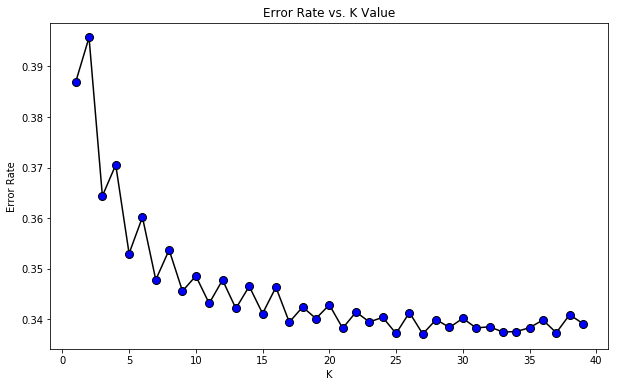

In [19]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='black', marker='o',markerfacecolor='blue', markersize=8)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [20]:
knn_model = KNeighborsClassifier(n_neighbors=27)
knn_scores = cross_validate(knn_model, df_data, df_target, cv=5,
                        scoring=scoring, return_train_score=False)

In [21]:
print("Accuracy test score: {:.3}".format(knn_scores['test_accuracy'].mean()))
print("Precision test score: {:.3}".format(knn_scores['test_precision'].mean()))
print("Sensitivty test score: {:.3}".format(knn_scores['test_recall'].mean()))
print("F Measure test score: {:.3}".format(knn_scores['test_f1_score'].mean()))

Accuracy test score: 0.71
Precision test score: 0.736
Sensitivty test score: 0.657
F Measure test score: 0.694


In [22]:
# DECISION TREE

In [23]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree_scores = cross_validate(dtree, df_data, df_target, cv=5,
                        scoring=scoring, return_train_score=False)

In [24]:
print("Accuracy test score: {:.3}".format(dtree_scores['test_accuracy'].mean()))
print("Precision test score: {:.3}".format(dtree_scores['test_precision'].mean()))
print("Sensitivty test score: {:.3}".format(dtree_scores['test_recall'].mean()))
print("F Measure test score: {:.3}".format(dtree_scores['test_f1_score'].mean()))

Accuracy test score: 0.633
Precision test score: 0.633
Sensitivty test score: 0.632
F Measure test score: 0.632


In [25]:
# RANDOM FORREST

In [26]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100)
rfc_scores = cross_validate(rfc, df_data, df_target, cv=5,
                        scoring=scoring, return_train_score=False)

In [27]:
print("Accuracy test score: {:.3}".format(rfc_scores['test_accuracy'].mean()))
print("Precision test score: {:.3}".format(rfc_scores['test_precision'].mean()))
print("Sensitivty test score: {:.3}".format(rfc_scores['test_recall'].mean()))
print("F Measure test score: {:.3}".format(rfc_scores['test_f1_score'].mean()))

Accuracy test score: 0.716
Precision test score: 0.723
Sensitivty test score: 0.701
F Measure test score: 0.712


In [28]:
# GAUSSIAN NAIVE BAYES

In [29]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb_scores = cross_validate(gnb, df_data, df_target, cv=5,
                        scoring=scoring, return_train_score=False)

In [30]:
print("Accuracy test score: {:.3}".format(gnb_scores['test_accuracy'].mean()))
print("Precision test score: {:.3}".format(gnb_scores['test_precision'].mean()))
print("Sensitivty test score: {:.3}".format(gnb_scores['test_recall'].mean()))
print("F Measure test score: {:.3}".format(gnb_scores['test_f1_score'].mean()))

Accuracy test score: 0.592
Precision test score: 0.73
Sensitivty test score: 0.294
F Measure test score: 0.419
